# Test de la reconstruction de mel spectrogram via MCNN et GRIFFIN LIM

In [1]:
from final_model import AudioDataset, WAE
import matplotlib.pyplot as plt
import librosa as li
from util import MCNN, audio_utilities as au
import torch
import numpy as np
from IPython.display import Audio

In [21]:
fs = 22050

MCNNNet = MCNN.build_pretrainedMCNN("new_MCNNtest16", "../pretrained/", 1, "cpu", 1, 500)[0]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MCNNNet = MCNNNet.to(device)
print(device)

importing intermediate training epoch = 500
building a basic MCNN network with 12 heads
head 0
head 1
head 2
head 3
head 4
head 5
head 6
head 7
head 8
head 9
head 10
head 11
cuda


In [22]:
uku = AudioDataset("../notebooks/motu/motu_dataset/*.wav", process=False)
model = torch.load("../pretrained/model_20000_epoch.pt")
model.eval()
print("done!")

done!


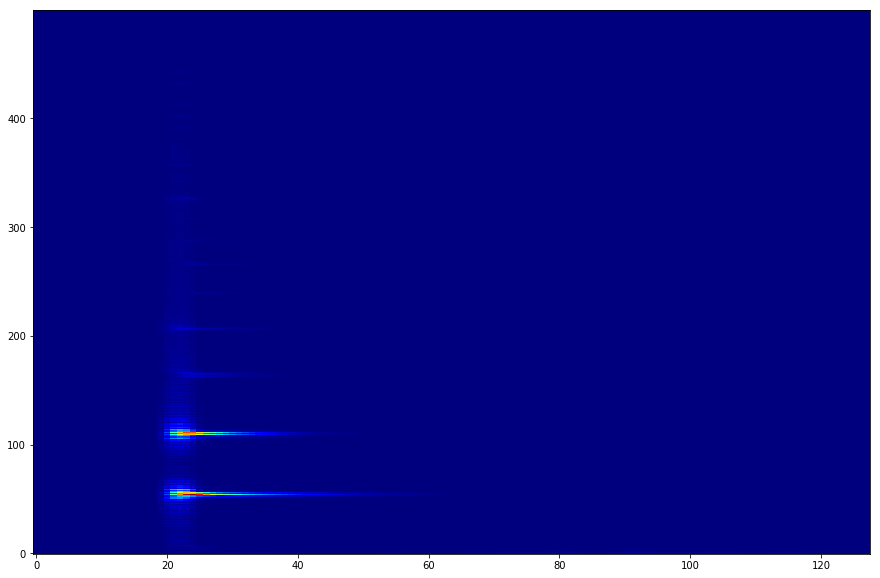

In [23]:
plt.figure(figsize=(15,10))
plt.imshow(uku[6],aspect="auto", origin="lower", cmap="jet")
plt.show()

In [24]:
idx = 9

In [25]:
x = MCNNNet(uku[idx].unsqueeze(0).to(device)).squeeze(0).cpu().detach().numpy()
x = x[22050//5:22050]
au.save_audio_to_file(x/max(abs(x)), fs, "MCNN_ori.wav")

/home/antoine/lap/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
Audio(x[22050//5:22050], rate=22050)

In [27]:
x = MCNNNet(model(uku[idx].unsqueeze(0).to(device))).squeeze(0).cpu().detach().numpy()
x = x[22050//5:22050]
au.save_audio_to_file(x/max(abs(x)), fs, "MCNN_model.wav")

/home/antoine/lap/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
Audio(x[22050//5:22050], rate=22050)

In [29]:
x, fs = li.load(uku.liste[idx].replace(".pt",".wav"))
x = x[22050//5:22050]
au.save_audio_to_file(x/max(abs(x)), fs, "Ground_Truth.wav")

/home/antoine/lap/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
Audio(x[22050//5:22050], rate=22050)

In [31]:
mel = li.filters.mel(fs,2048,500)
STFT = mel.T.dot(uku[idx])

x = au.reconstruct_signal_griffin_lim(STFT.T, 2048, 256, 200)
x = x[22050//5:22050]
au.save_audio_to_file(x/max(abs(x)), fs, "Griffin_LIM_ori.wav")

/home/antoine/lap/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [32]:
Audio(x,rate=fs)

In [33]:
mel = li.filters.mel(fs,2048,500)
STFT = mel.T.dot(model(uku[idx].to(device).unsqueeze(0)).cpu().squeeze(0).detach().numpy())

x = au.reconstruct_signal_griffin_lim(STFT.T, 2048, 256, 200)
x = x[22050//5:22050]
au.save_audio_to_file(x/max(abs(x)), fs, "Griffin_LIM_model.wav")

/home/antoine/lap/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


In [34]:
Audio(x,rate=fs)

In [35]:
violon = np.load("violin.npy").item()

In [40]:
STFT = mel.dot(abs(li.stft(violon[0][0], n_fft=2048, hop_length=256)))

In [42]:
x = MCNNNet(torch.from_numpy(STFT).float().to(device).unsqueeze(0)).cpu().detach().squeeze(0).numpy()

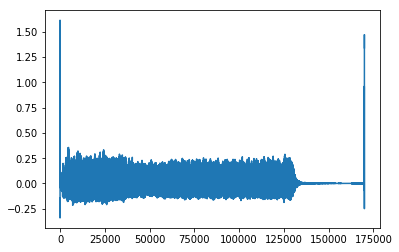

In [44]:
plt.plot(x)

In [45]:
Audio(x,rate=fs)

In [46]:
Audio(violon[0][0], rate=fs)

In [2]:
GC = AudioDataset("../notebooks/motu/motu_dataset/*.wav", False, 32)

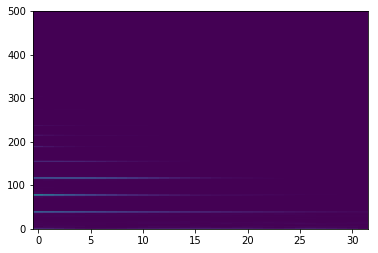

In [8]:
plt.imshow(GC[5], aspect="auto", origin="lower")